In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [18]:
dfcar = pd.read_csv(r"C:\Users\booma\OneDrive\Desktop\car data.csv")

In [19]:
dfcar


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [20]:
dfcar.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
dfcar.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

# Error Detecting (Year)


<Axes: >

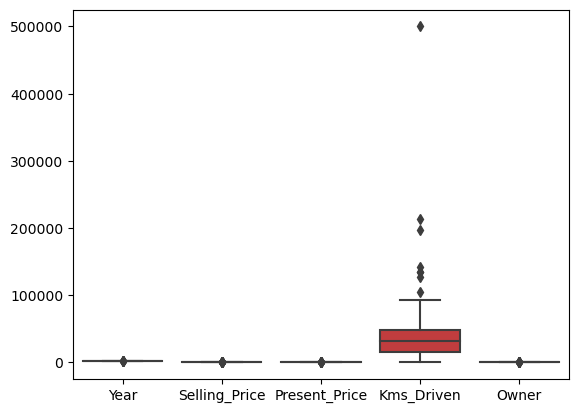

In [22]:
sns.boxplot(dfcar)

In [23]:
import warnings

In [24]:
warnings.filterwarnings("ignore")

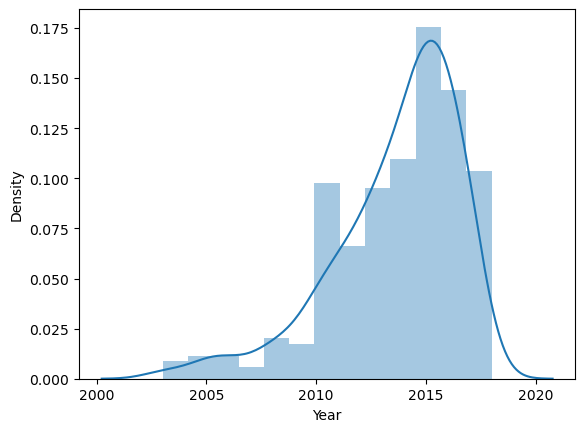

In [25]:
sns.distplot(dfcar["Year"])
plt.show()

In [26]:
dfcar["Year"].skew()

-1.2461891109538386

In [27]:
dfcar["Year"].skew().round()

-1.0

In [28]:
m = dfcar["Year"].mean()

In [29]:
q1 = dfcar["Year"].quantile(0.25)

In [30]:
q3 = dfcar["Year"].quantile(0.75)

In [31]:
q1

2012.0

In [32]:
q3

2016.0

In [33]:
iqr = q3-q1

In [34]:
iqr

4.0

In [35]:
low = q1 - (1.5 * iqr)

In [36]:
upp = q3 + (1.5 * iqr)

In [37]:
low

2006.0

In [38]:
upp

2022.0

In [39]:
m

2013.6279069767443

In [40]:
dfcar[dfcar["Year"]<low]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
92,innova,2005,3.51,13.70,75000,Petrol,Dealer,Manual,0
189,Hero Super Splendor,2005,0.20,0.57,55000,Petrol,Individual,Manual,0


In [41]:
dfcar[dfcar["Year"]>upp]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


# Capping

In [42]:
dfcar["Year"].map(lambda x : m if x<low  else m if x>upp else x)

0      2014.0
1      2013.0
2      2017.0
3      2011.0
4      2014.0
        ...  
296    2016.0
297    2015.0
298    2009.0
299    2017.0
300    2016.0
Name: Year, Length: 301, dtype: float64

In [43]:
dfcar["Year"] = dfcar["Year"].map(lambda x : m if x<low  else m if x>upp else x)

In [44]:
dfcar

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [45]:
dfcar["Year"][37]

2013.6279069767443

# Error detection  (Selling_Price )

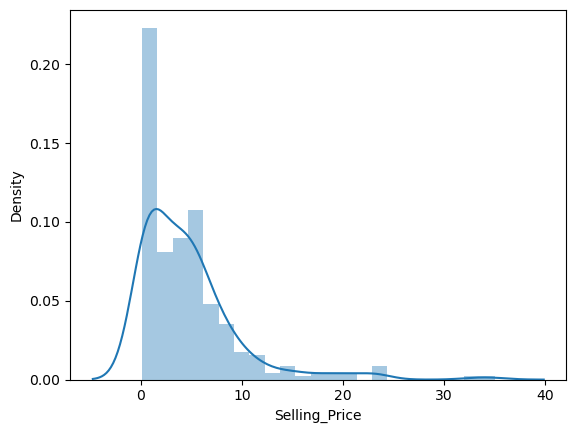

In [46]:
sns.distplot(dfcar["Selling_Price"])
plt.show()

In [47]:
dfcar["Selling_Price"].skew()

2.493422417797524

In [48]:
dfcar["Selling_Price"].skew().round()

2.0

In [49]:
m1 = dfcar["Selling_Price"].mean()

In [50]:
q1 = dfcar["Selling_Price"].quantile(0.25)

In [51]:
q3 = dfcar["Selling_Price"].quantile(0.75)

In [52]:
iqr = q3-q1

In [53]:
iqr

5.1

In [54]:
q1

0.9

In [55]:
q3

6.0

In [56]:
lower = q1 - (1.5*iqr)

In [57]:
upper = q3 + (1.5*iqr)

In [58]:
lower

-6.749999999999999

In [59]:
upper

13.649999999999999

In [60]:
m1

4.661295681063123

In [61]:
dfcar[dfcar["Selling_Price"]<low]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [62]:
dfcar[dfcar["Selling_Price"]>upp]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [63]:
dfcar["Selling_Price"].map(lambda x : m1 if x<lower  else m1 if x>upper else x)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [64]:
dfcar["Selling_Price"]=dfcar["Selling_Price"].map(lambda x : m1 if x<lower  else m1 if x>upper else x)

In [65]:
dfcar

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [66]:
dfcar["Selling_Price"][51]

4.661295681063123

# Error Detection (Present_Price)

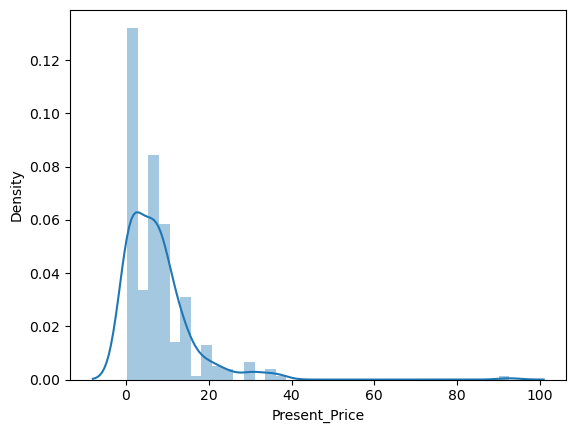

In [67]:
sns.distplot(dfcar["Present_Price"])
plt.show()

In [68]:
dfcar["Present_Price"].skew()

4.083150156592918

In [69]:
dfcar["Present_Price"].skew().round()

4.0

In [70]:
m2 = dfcar["Present_Price"].mean()

In [71]:
q1 = dfcar["Present_Price"].quantile(0.25)

In [72]:
q3 = dfcar["Present_Price"].quantile(0.75)

In [73]:
q1

1.2

In [74]:
q3

9.9

In [75]:
m2

7.628471760797343

In [76]:
lowerr = q1 - (1.5*iqr)

In [77]:
upperr = q3 + (1.5*iqr)

In [78]:
lowerr

-6.449999999999999

In [79]:
upperr

17.55

In [80]:
dfcar[dfcar["Present_Price"]<lowerr]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [81]:
dfcar[dfcar["Present_Price"]>upperr]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012.0,4.661296,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015.0,4.661296,30.61,40000,Diesel,Dealer,Automatic,0
52,innova,2017.0,4.661296,19.77,15000,Diesel,Dealer,Automatic,0
53,fortuner,2013.0,4.661296,30.61,135000,Diesel,Individual,Automatic,0
57,corolla altis,2010.0,4.750000,18.54,50000,Petrol,Dealer,Manual,0
59,fortuner,2014.0,4.661296,35.96,41000,Diesel,Dealer,Automatic,0
60,corolla altis,2013.0,6.950000,18.61,40001,Petrol,Dealer,Manual,0
62,fortuner,2014.0,4.661296,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015.0,4.661296,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017.0,4.661296,36.23,6000,Diesel,Dealer,Automatic,0


In [82]:
dfcar["Present_Price"].map(lambda x : m2  if x<lowerr  else m2 if x>upperr else x )

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [83]:
dfcar["Present_Price"]= dfcar["Present_Price"].map(lambda x : m2  if x<lowerr  else m2 if x>upperr else x )

In [84]:
dfcar

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [85]:
dfcar["Present_Price"][78]

7.628471760797343

In [86]:
dfcar.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Error Detection (Kms_Driven)

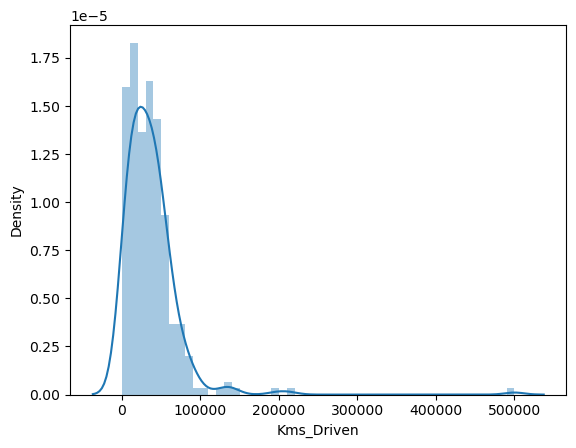

In [87]:
sns.distplot(dfcar["Kms_Driven"])
plt.show()

In [88]:
dfcar["Kms_Driven"].skew()

6.436012679752193

In [89]:
dfcar["Kms_Driven"].skew().round()

6.0

In [90]:
m3 = dfcar["Kms_Driven"].mean()

In [91]:
m3

36947.20598006644

In [92]:
q1 = dfcar["Kms_Driven"].quantile(0.25)

In [93]:
q3 = dfcar["Kms_Driven"].quantile(0.75)

In [94]:
iqr = q3-q1

In [95]:
q1

15000.0

In [96]:
q3

48767.0

In [97]:
iqr

33767.0

In [98]:
lower1 = q1 -(1.5*iqr)

In [99]:
upper1 = q3 +(1.5*iqr)

In [100]:
lower1

-35650.5

In [101]:
upper1


99417.5

In [102]:
dfcar[dfcar["Kms_Driven"]<lower1]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [103]:
dfcar[dfcar["Kms_Driven"]>upper1]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2013.627907,0.350000,2.280000,127000,Petrol,Individual,Manual,0
50,fortuner,2012.000000,4.661296,7.628472,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013.000000,4.661296,7.628472,135000,Diesel,Individual,Automatic,0
77,corolla,2013.627907,1.500000,12.350000,135154,Petrol,Dealer,Automatic,0
84,innova,2013.627907,3.490000,13.460000,197176,Diesel,Dealer,Manual,0
85,camry,2006.000000,2.500000,7.628472,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010.000000,0.310000,1.050000,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008.000000,0.170000,0.520000,500000,Petrol,Individual,Automatic,0


In [104]:
dfcar["Kms_Driven"].map(lambda x : m3 if x<lower1 else  m3 if x>upper1 else x)

0      27000.0
1      43000.0
2       6900.0
3       5200.0
4      42450.0
        ...   
296    33988.0
297    60000.0
298    87934.0
299     9000.0
300     5464.0
Name: Kms_Driven, Length: 301, dtype: float64

In [105]:
dfcar['Kms_Driven']=dfcar["Kms_Driven"].map(lambda x : m3 if x<lower1 else  m3 if x>upper1 else x)

In [106]:
dfcar

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [107]:
dfcar['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

# Error detection (Owner)

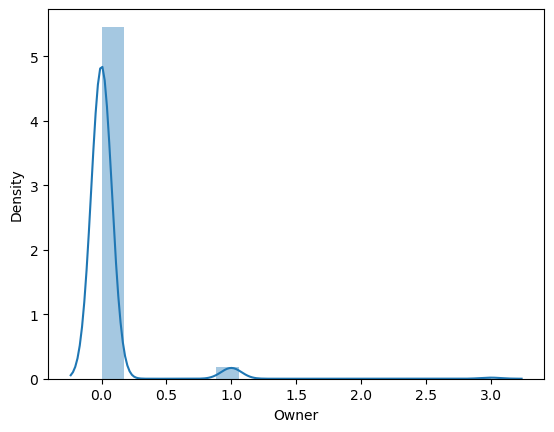

In [108]:
sns.distplot(dfcar["Owner"])
plt.show()

In [109]:
dfcar["Owner"].skew()

7.616849679389442

In [110]:
dfcar["Owner"].skew().round()

8.0

In [111]:
m4 = dfcar["Owner"].mean()

In [112]:
q1 = dfcar["Owner"].quantile(0.25)

In [113]:
q3 = dfcar["Owner"].quantile(0.75)

In [114]:
iqr = q3-q1

In [115]:
m4 

0.04318936877076412

In [116]:
q1

0.0

In [117]:
q3

0.0

In [118]:
iqr

0.0

In [119]:
lower2 = q1-(1.5*iqr)

In [120]:
upper2 = q3+(1.5*iqr)

In [121]:
lower2

0.0

In [122]:
upper2


0.0

In [123]:
dfcar[dfcar["Owner"]<lower2]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [124]:
dfcar[dfcar["Owner"]>upper2]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
58,etios g,2014.0,4.10,6.800000,39485.00000,Petrol,Dealer,Manual,1
85,camry,2006.0,2.50,7.628472,36947.20598,Petrol,Individual,Automatic,3
106,Hyosung GT250R,2014.0,1.35,3.450000,16500.00000,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008.0,0.25,0.750000,26000.00000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012.0,0.20,0.570000,25000.00000,Petrol,Individual,Manual,1
192,Hero Hunk,2007.0,0.20,0.750000,49000.00000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013.0,0.20,0.650000,24000.00000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011.0,0.15,0.570000,35000.00000,Petrol,Individual,Manual,1
201,i20,2010.0,3.25,6.790000,58000.00000,Diesel,Dealer,Manual,1
205,grand i10,2016.0,5.25,5.700000,3493.00000,Petrol,Dealer,Manual,1


In [125]:
dfcar["Owner"].map(lambda x : m4 if x<lower2 else m4 if x>upper2 else x)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
296    0.0
297    0.0
298    0.0
299    0.0
300    0.0
Name: Owner, Length: 301, dtype: float64

In [126]:
dfcar["Owner"]=dfcar["Owner"].map(lambda x : m4 if x<lower2 else m4 if x>upper2 else x)

In [127]:
dfcar

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988.0,Diesel,Dealer,Manual,0.0
297,brio,2015.0,4.00,5.90,60000.0,Petrol,Dealer,Manual,0.0
298,city,2009.0,3.35,11.00,87934.0,Petrol,Dealer,Manual,0.0
299,city,2017.0,11.50,12.50,9000.0,Diesel,Dealer,Manual,0.0


In [128]:
dfcar["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [129]:
dfcar["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

# Encoding

In [130]:
dfcar = pd.get_dummies(dfcar,drop_first=True)

In [131]:
dfcar

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014.0,3.35,5.59,27000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013.0,4.75,9.54,43000.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017.0,7.25,9.85,6900.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011.0,2.85,4.15,5200.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014.0,4.60,6.87,42450.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016.0,9.50,11.60,33988.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
297,2015.0,4.00,5.90,60000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298,2009.0,3.35,11.00,87934.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
299,2017.0,11.50,12.50,9000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# Separation Data

In [132]:
x = dfcar.drop("Selling_Price",axis=1)

In [133]:
x

,Year,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014.0,5.59,27000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013.0,9.54,43000.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017.0,9.85,6900.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011.0,4.15,5200.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014.0,6.87,42450.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016.0,11.60,33988.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
297,2015.0,5.90,60000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298,2009.0,11.00,87934.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
299,2017.0,12.50,9000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [134]:
y = dfcar["Selling_Price"]

In [135]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting Data

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20,random_state=1)

In [138]:
x.shape,x_train.shape,x_test.shape

((301, 105), (240, 105), (61, 105))

In [139]:
y.shape,y_train.shape,y_test.shape

((301,), (240,), (61,))

In [140]:
x_train.head()

,Year,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
102,2017.0,1.78,4000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
80,2016.0,14.89,23000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
245,2012.0,9.40,71000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
163,2010.0,0.95,27000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
131,2015.0,0.82,18000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
from xgboost import XGBRegressor

In [143]:
xgb = XGBRegressor()

In [144]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [145]:
xgb.score(x_test,y_test)

0.9579534831023397

# Auto

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
from sklearn.svm import SVR

In [148]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [149]:
from xgboost import XGBRFRegressor

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
dcr = DecisionTreeRegressor()

In [152]:
svm = SVR()

In [153]:
rfg = RandomForestRegressor()

In [154]:
adbr = AdaBoostRegressor()

In [155]:
grand = GradientBoostingRegressor()

In [156]:
xgb = XGBRegressor()

In [157]:
lr = LinearRegression()

In [158]:
clist = [dcr,svm,rfg,adbr,grand,xgb,lr]

In [159]:
clist

[DecisionTreeRegressor(),
 SVR(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 LinearRegression()]

In [160]:
import time

In [161]:
for i in clist:
    print(i.,end = "==")
    i.fit(x_train,y_train)
    m = i.score(x_test,y_test)
    print(m)
    time.sleep(0.6)

DecisionTreeRegressor()==0.9229463372884625
SVR()==0.08403979088822089
RandomForestRegressor()==0.9520104666031075
AdaBoostRegressor()==0.9051391914357054
GradientBoostingRegressor()==0.9497406620279417
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9579534831023397
LinearRegression()==0.84709928690850

In [162]:
for i in range(0,51):
    print("random_state=",i)
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20,random_state=i)
    rlist=[]
    for m in clist:
        print(m,end = "==")
        m.fit(x_train,y_train)
        s = m.score(x_test,y_test)
        print(s)
        rlist.append(s)
    print(rlist)    
    print("_______________________________________________________________________________________")
    print("Max = ",max(rlist))
    rlist.index(max(rlist))
    print("Max_index =",rlist.index(max(rlist)))
    print("____________________________________________________________________________________________")

random_state= 0
DecisionTreeRegressor()==0.8488112434055908
SVR()==-0.16491834375732517
RandomForestRegressor()==0.9221146367069065
AdaBoostRegressor()==0.9053715987652465
GradientBoostingRegressor()==0.9339973955347922
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.897545189182291
LinearRegression()==

RandomForestRegressor()==0.9225663686467505
AdaBoostRegressor()==0.876262748941498
GradientBoostingRegressor()==0.9118339418864442
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9024885387954908
LinearRegression()==0.8588556138375818
[0.9126262803932512, -0.052608079341552205, 0.9225663686467505, 0.876

RandomForestRegressor()==0.9209402241654424
AdaBoostRegressor()==0.8969117456239836
GradientBoostingRegressor()==0.8906795729212108
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.922106869701947
LinearRegression()==0.745981149853244
[0.8858996056062112, -0.2541276465593316, 0.9209402241654424, 0.896911

RandomForestRegressor()==0.9268901434684321
AdaBoostRegressor()==0.8867838736635252
GradientBoostingRegressor()==0.9116838065685999
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.8763021104564661
LinearRegression()==0.8483604393800598
[0.9077729740150118, 0.12560417384276445, 0.9268901434684321, 0.8867

RandomForestRegressor()==0.958486159012621
AdaBoostRegressor()==0.8955823821205162
GradientBoostingRegressor()==0.9410803533649253
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9532562459502658
LinearRegression()==0.845731928478071
[0.9245774913361435, 0.07477876650565274, 0.958486159012621, 0.8955823

RandomForestRegressor()==0.9083392682687765
AdaBoostRegressor()==0.8544529228336917
GradientBoostingRegressor()==0.9241025776367893
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9278366542430289
LinearRegression()==0.710083595784262
[0.6763829493467386, -0.0055183412684789435, 0.9083392682687765, 0.85

RandomForestRegressor()==0.8056717746947901
AdaBoostRegressor()==0.7780058869648174
GradientBoostingRegressor()==0.7915672956007791
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.7706546158219892
LinearRegression()==0.6743722951328517
[0.8037292602316347, -0.05514546501328521, 0.8056717746947901, 0.778

RandomForestRegressor()==0.8815306650522506
AdaBoostRegressor()==0.9077253120812462
GradientBoostingRegressor()==0.8949087656709597
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9047118084752876
LinearRegression()==0.8089140206429737
[0.903113178460467, -0.06022356753938629, 0.8815306650522506, 0.9077

RandomForestRegressor()==0.9448866697561547
AdaBoostRegressor()==0.9210856470346591
GradientBoostingRegressor()==0.9546376490562729
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)==0.9511295565204174
LinearRegression()==0.8339538890938794
[0.9502279421894739, -0.009859746423552362, 0.9448866697561547, 0.92